In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
plt.rc('font', family='Arial')

In [2]:
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered_rankedidea/cellular_fraction/perctcorr/maxscorect_cytof/maxscorFract_allct_towardsSM_dummy_mean_SM.txt_unique_result_dupindex_binnedstats.pkl_maxscore_CSxOut.txt_cytof.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

#Cytof
order = ['NaiveCD4','cm4', 'em4','Tregs','NK','Mono','NaiveCD8','cm8','em8','ed8', 'nB','mB']

#Flow
#order = ['NaiveCD4','cm4', 'em4','Tregs','NK','Mono', 'nB','mB']

#order = ['cm4']

colors = ['b','c','g','r','m','y','tab:blue','tab:orange','tab:purple','tab:pink','darkviolet','dodgerblue', 'coral', 'brown']

row_num = 2
col_num = 6

df.columns

Index(['Eo', 'Er', 'M0', 'M1', 'M2', 'Mg', 'Mono', 'NK', 'NaiveCD4',
       'NaiveCD8', 'PC', 'PMN', 'Tregs', 'cm4', 'cm8', 'ed8', 'em4', 'em8',
       'iDC', 'mB', 'mDC', 'nB', 'Mono_real', 'NK_real', 'mB_real', 'nB_real',
       'NaiveCD4_real', 'NaiveCD8_real', 'Tregs_real', 'cm4_real', 'em4_real',
       'cm8_real', 'em8_real', 'ed8_real', 'PC_real'],
      dtype='object')

In [3]:
def renamect(act):
    if act=='CD4':
        return 'Naive CD4 T'
    if act=='CD8':
        return 'Naive CD8 T'

    if act=='NaiveCD4':
        return 'Naive CD4 T'
    if act=='NaiveCD8':
        return 'Naive CD8 T'
    if act=='Tr':
        return 'Tregs'
    if act=='mB':
        return 'Memory B'
    if act=='nB':
        return 'Naive B'
    if act=='m4':
        return 'Memory CD4 T'
    if act=='m8':
        return 'Memory CD8 T'
    if act=='Mn':
        return 'Monocyte'


    if act=='em8':
        return 'CD8 TEM'
    if act=='cm8':
        return 'CD8 TCM'

    if act=='em4':
        return 'CD4 TEM'
    if act=='cm4':
        return 'CD4 TCM'


    if act=='ed8':
        return 'CD8 TEMRA'

    if act=='PC':
        return 'PC'

    if act=='M0':
        return 'Mac (M0)'

    if act=='M1':
        return 'Mac (M1)'

    if act=='M2':
        return 'Mac (M2)'
    if act=='Eo':
        return 'Eos'

    if act=='Mg':
        return 'MK'




    return act

0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 1
1 2
1 3
1 4
1 5


Text(0.008, 0.5, 'soft RC score (mincpg=3)')

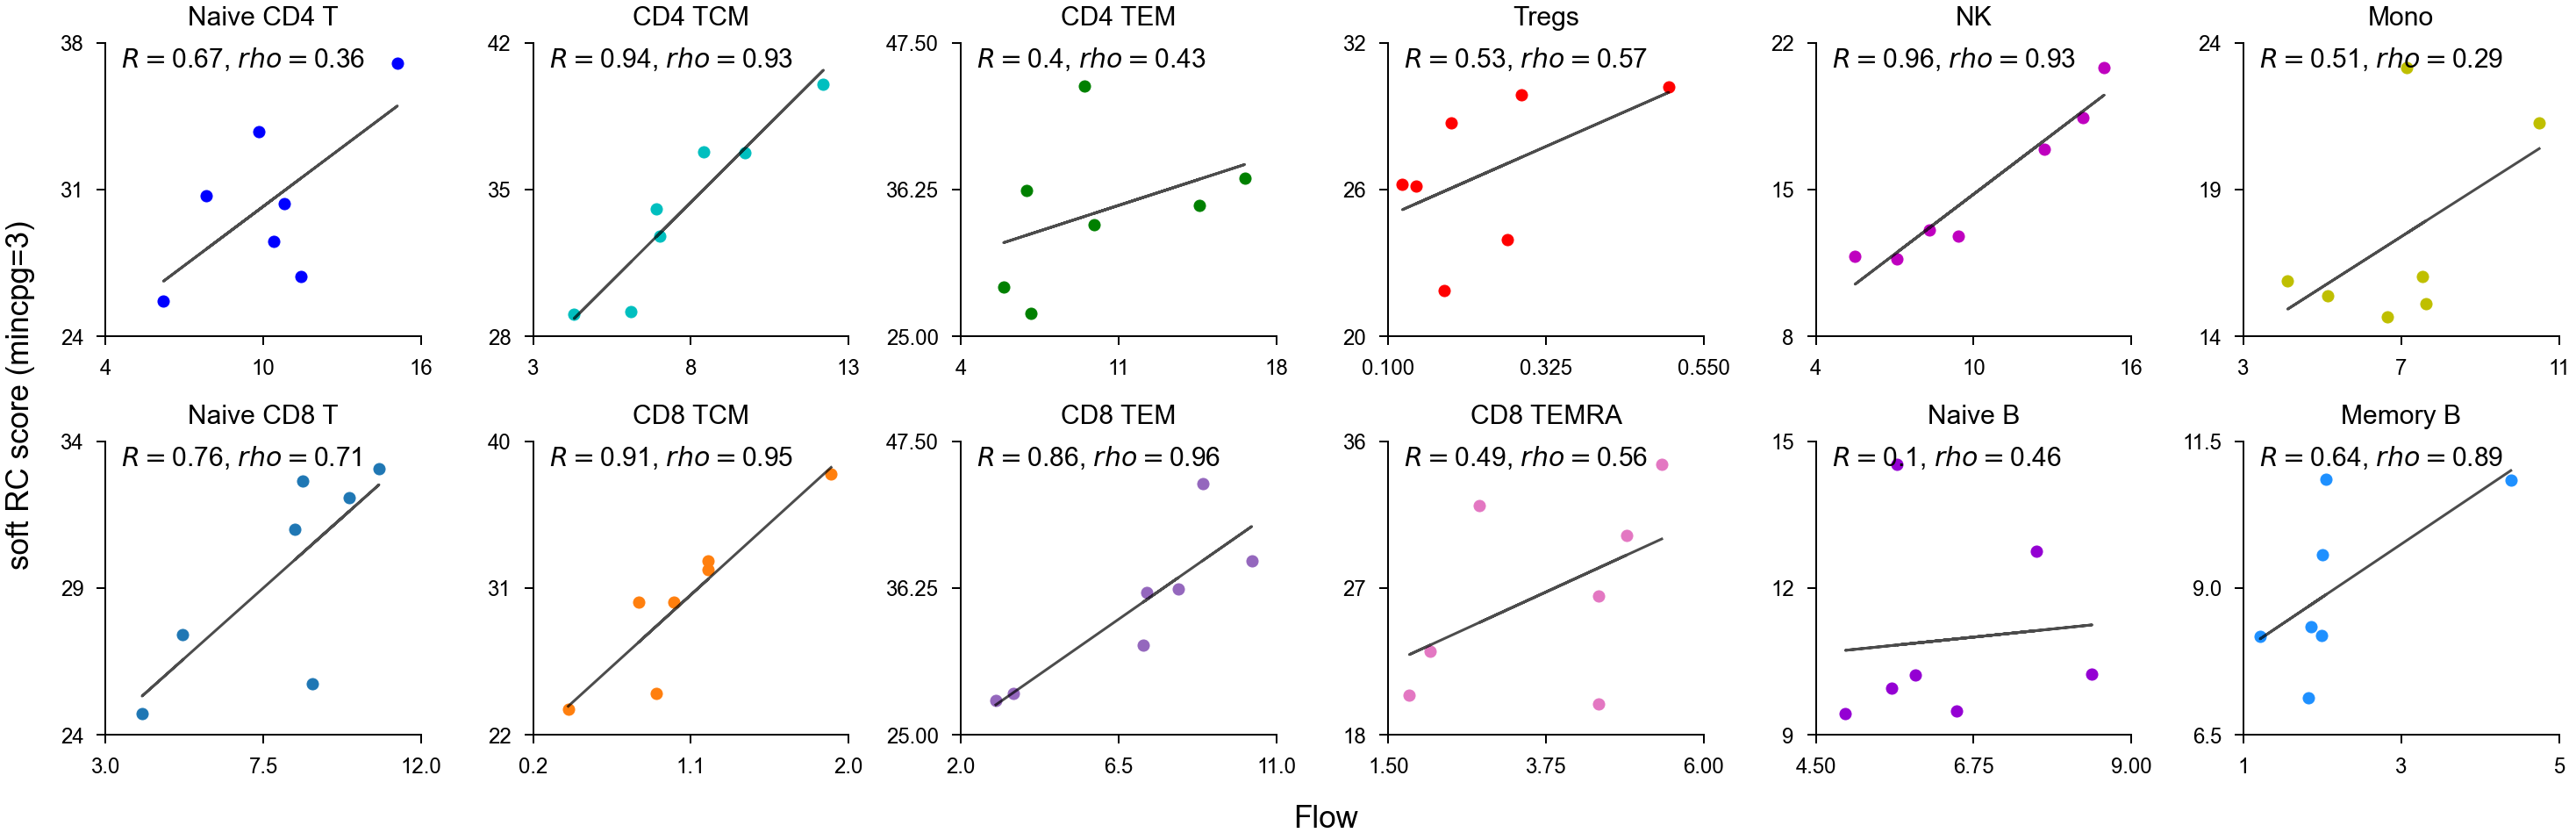

In [4]:
fig, axs = plt.subplots(row_num, col_num, figsize=(col_num * 7, row_num * 7))
fig.tight_layout(pad=10)

r = 0
c = 0
for i, cell in enumerate(order):
    print(r, c)
    x = np.array(df[cell + '_real'])
    y = np.array(df[cell])
    m, b = np.polyfit(x, y, deg=1)
    y_fit = m * x + b
    R = np.around(pearsonr(x, y)[0], decimals=2)
    rho = np.around(spearmanr(x, y)[0], decimals=2)
    if c >= len(axs[0]):
        c = 0
        r += 1
    axs[r][c].scatter(x, y, c=colors[i], s=170)
    axs[r][c].plot(x, y_fit, c='k', alpha=0.7, lw=3)
    axs[r][c].set_title(renamect(cell), fontsize=30, pad=20)
    xticks = axs[r][c].get_xticks()
    axs[r][c].set_xticks([xticks[0], (xticks[0] + xticks[-1])/2, xticks[-1]])
    yticks = axs[r][c].get_yticks()
    axs[r][c].set_yticks([yticks[0], (yticks[0] + yticks[-1])/2, yticks[-1]])
    axs[r][c].tick_params(axis='both', labelsize=24, pad=15, direction='out', length=10, width=2)
    for axis in ['top','bottom','left','right']:
        axs[r][c].spines[axis].set_linewidth(2)
    axs[r][c].text(0.05, 0.9, '$\it{R = }$' + str(R)+", $\it{rho = }$"+str(rho), horizontalalignment='left', verticalalignment='bottom', fontsize=30, transform=axs[r][c].transAxes)
    #axs[r][c].annotate('0.25 on axes', (0.25, 0.25), textcoords='axes fraction', size=20)
    #axs[r][c].text(0.5, 0.5, 'R = ' + str(R), size=24, ha='left', va='top')
    #plt.annotate('R = ' + str(R), xy=(0.9, 0.1), xycoords='axes fraction')
    axs[r][c].spines['right'].set_visible(False)
    axs[r][c].spines['top'].set_visible(False)
    c += 1

'''
plt.annotate('', xy=(-1.3, -0.29), xycoords='axes fraction', xytext=(1.0, -0.29), fontsize=18, ha='left',
            arrowprops=dict(arrowstyle="-", color='k', lw=2))
plt.annotate('', xy=(1.0, -0.35), xycoords='axes fraction', xytext=(1.0, -0.23), fontsize=18, ha='left',
            arrowprops=dict(arrowstyle="-", color='k', lw=2))

plt.annotate('', xy=(-5.485, -0.35), xycoords='axes fraction', xytext=(-5.485, -0.23), fontsize=18, ha='left',
            arrowprops=dict(arrowstyle="-", color='k', lw=2))
plt.annotate('', xy=(-5.485, -0.29), xycoords='axes fraction', xytext=(-3.2, -0.29), fontsize=18, ha='left',
            arrowprops=dict(arrowstyle="-", color='k', lw=2))

plt.annotate('', xy=(-5.767, 0.0), xycoords='axes fraction', xytext=(-5.767, 0.7), fontsize=18, ha='left',
            arrowprops=dict(arrowstyle="-", color='k', lw=2))
plt.annotate('', xy=(-5.707, 0.0), xycoords='axes fraction', xytext=(-5.827, 0.0), fontsize=18, ha='left',
            arrowprops=dict(arrowstyle="-", color='k', lw=2))

plt.annotate('', xy=(-5.767, 1.6), xycoords='axes fraction', xytext=(-5.767, 2.365), fontsize=18, ha='left',
            arrowprops=dict(arrowstyle="-", color='k', lw=2))
plt.annotate('', xy=(-5.707, 2.365), xycoords='axes fraction', xytext=(-5.827, 2.365), fontsize=18, ha='left',
            arrowprops=dict(arrowstyle="-", color='k', lw=2))
#fig.text(0.45, 0.055, '_____________________________________________________________________', ha='right', va='center', size=35)
#fig.text(0.55, 0.055, '_____________________________________________________________________', ha='left', va='center', size=35)

#fig.text(-0.005, 0.85, '____________', ha='center', va='top', rotation='vertical', size=35)
#fig.text(-0.005, 0.17, '___________', ha='center', va='bottom', rotation='vertical', size=35)
'''
fig.text(0.5, 0.02, 'Flow', ha='center', va='center', size=35)
fig.text(0.008, 0.5, 'soft RC score (mincpg=3)', ha='center', va='center', rotation='vertical', size=35)

In [5]:
fig.savefig(file + '_figure_combined_cell.pdf', dpi=300, bbox_inches='tight')